In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Model
import tensorflow as tf
from keras_preprocessing.image import load_img
from tensorflow.keras.optimizers import RMSprop,Adam
# from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2


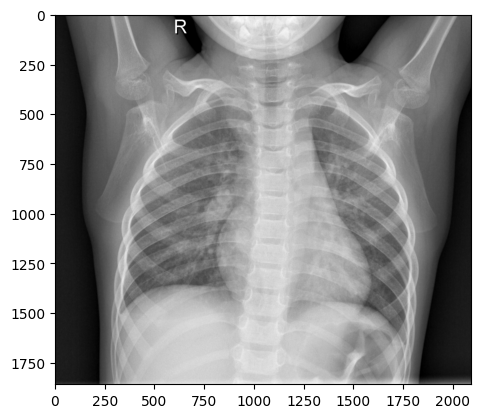

In [3]:
img=load_img("Archive/train/NORMAL/IM-0115-0001.JPEG")
plt.imshow(img)
plt.show()

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen=ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:

train = train_datagen.flow_from_directory('Archive/train',
                                           target_size=(200, 200),
                                           batch_size=10,
                                           class_mode='binary')


validation = validation_datagen.flow_from_directory('Archive/val',
                                           target_size=(200, 200),
                                           batch_size=10,
                                           class_mode='binary')
test = test_datagen.flow_from_directory('Archive/test',
                                           target_size=(200, 200),
                                           batch_size=10,
                                           class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [6]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3))
                                 ,tf.keras.layers.MaxPool2D(2,2),
                                 # 
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu')
                                 ,tf.keras.layers.MaxPool2D(2,2),

                                  tf.keras.layers.Conv2D(128,(3,3),activation='relu')
                                 ,tf.keras.layers.MaxPool2D(2,2),

                                  tf.keras.layers.Conv2D(256,(3,3),activation='relu')
                                 ,tf.keras.layers.MaxPool2D(2,2),

                                  tf.keras.layers.Conv2D(512,(3,3),activation='relu')
                                 ,tf.keras.layers.MaxPool2D(2,2),

                                  tf.keras.layers.Flatten(),

                                  tf.keras.layers.Dense(512,activation='relu'),

                                  tf.keras.layers.Dense(1,activation='sigmoid')
                                  
                                  
                                 ])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 128)       0

In [8]:
model.compile(loss='binary_crossentropy',
              # optimizer=RMSprop(learning_rate=0.001),
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [11]:
model_fit=model.fit(train,
                    steps_per_epoch=163,
                    epochs=16,
                    validation_data=validation)

Epoch 1/16
163/163 [==============================] - 115s 708ms/step - loss: 0.2681 - accuracy: 0.8973 - val_loss: 0.8419 - val_accuracy: 0.7500
Epoch 2/16
163/163 [==============================] - 120s 735ms/step - loss: 0.2120 - accuracy: 0.9098 - val_loss: 1.2017 - val_accuracy: 0.6875
Epoch 3/16
163/163 [==============================] - 110s 673ms/step - loss: 0.2180 - accuracy: 0.9166 - val_loss: 0.9727 - val_accuracy: 0.6875
Epoch 4/16
163/163 [==============================] - 108s 663ms/step - loss: 0.2175 - accuracy: 0.9074 - val_loss: 0.6439 - val_accuracy: 0.8750
Epoch 5/16
163/163 [==============================] - 107s 655ms/step - loss: 0.1971 - accuracy: 0.9194 - val_loss: 0.8724 - val_accuracy: 0.7500
Epoch 6/16
163/163 [==============================] - 109s 669ms/step - loss: 0.1810 - accuracy: 0.9215 - val_loss: 0.3195 - val_accuracy: 0.9375
Epoch 7/16
163/163 [==============================] - 107s 656ms/step - loss: 0.1998 - accuracy: 0.9200 - val_loss: 1.0728 -

In [12]:
model.evaluate(test)

63/63 [==============================] - 22s 344ms/step - loss: 0.9649 - accuracy: 0.8285


[0.964859664440155, 0.8285256624221802]

63/63 [==============================] - 9s 137ms/step


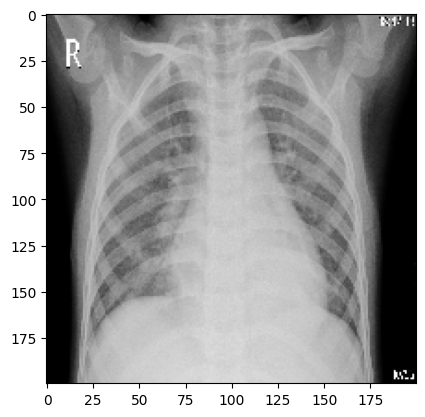

the probability of Pneumonia is: [0.92125547]


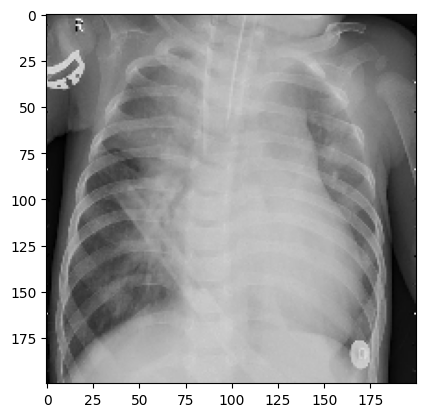

the probability of Pneumonia is: [0.9938732]


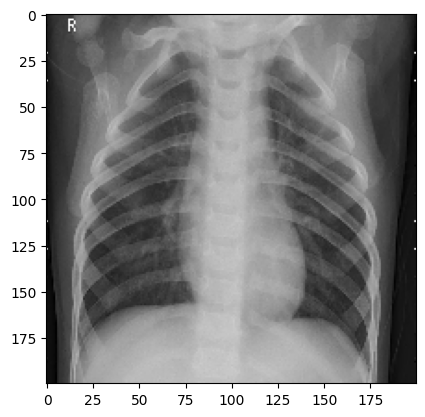

the probability of Pneumonia is: [0.6614757]


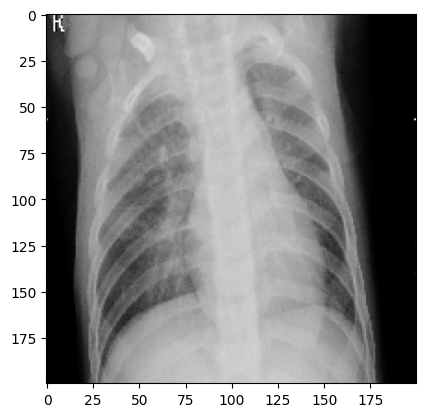

the probability of Pneumonia is: [0.9999955]


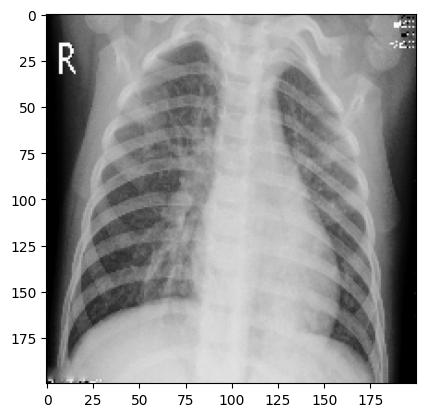

the probability of Pneumonia is: [0.89162153]


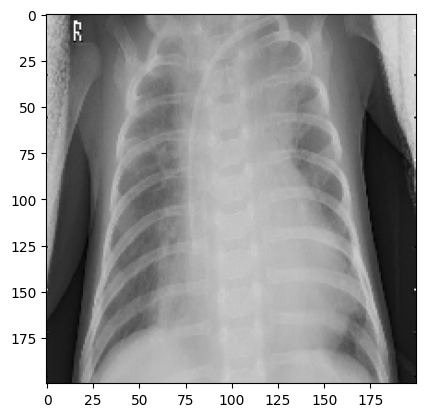

the probability of Pneumonia is: [0.99998814]


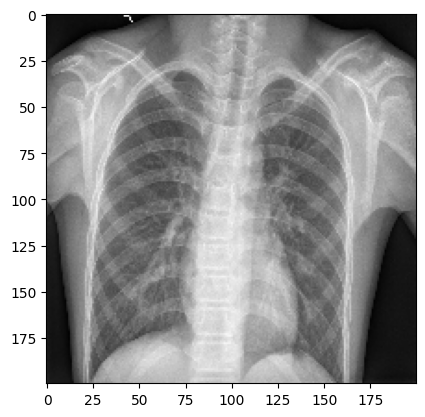

the probability of Pneumonia is: [0.9999991]


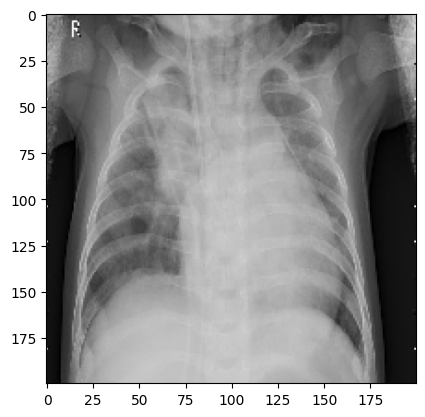

the probability of Pneumonia is: [0.4744847]


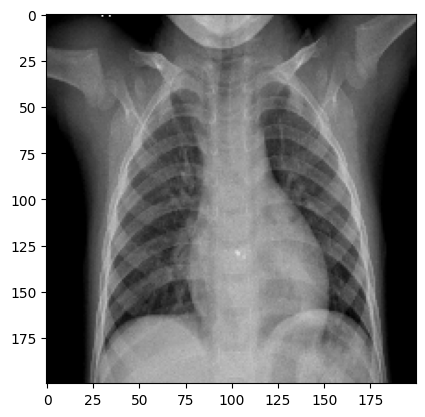

the probability of Pneumonia is: [0.999999]


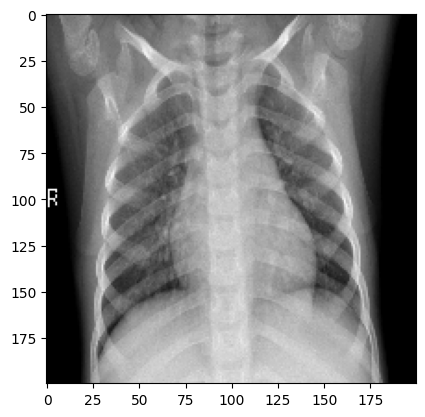

the probability of Pneumonia is: [0.999996]


In [15]:
predictions=model.predict(test)
x=test.next()
for i in range(0,1):
    image=x[i]
    for j in range(0,10):
        plt.imshow(image[j])
        
        plt.show()
        print("the probability of Pneumonia is:",predictions[j])